# ESTDA

## Plot the flows change for different modes in London

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates
import datetime

ModuleNotFoundError: No module named 'geopandas'

In [21]:
# load the data
flows_lsoa = '/Users/zonghe/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Zonghe Ma/processed data/flows_lsoa.shp'
flows_lsoa = gpd.read_file(flows_lsoa, crs={'init': 'epsg:27700'})
inoutter = '/Users/zonghe/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Zonghe Ma/Raw data/London administrative boundaries/lp-consultation-oct-2009-inner-outer-london-shp/lp-consultation-oct-2009-inner-outer-london.shp'
inoutter = gpd.read_file(inoutter, crs={'init': 'epsg:27700'})
flows_lsoa = gpd.sjoin(flows_lsoa, inoutter, how='inner', op='within')
flows_lsoa.drop(columns=['index_right', 'Source', 'Area_Ha', 'Shape_Leng', 'Shape_Area'], inplace=True)
flows_lsoa.rename(columns={'Boundary': 'Inner_Outer'}, inplace=True)

print(flows_lsoa.head())
print(flows_lsoa.columns)
print(len(flows_lsoa['LSOA21CD'].unique()))
print(len(flows_lsoa['date'].unique()))
print(flows_lsoa.describe())

In [22]:
# organize the flows data
flows_londonsum = flows_lsoa.groupby('date').aggregate(
    {'bus': 'sum', 'car': 'sum', 'cycle': 'sum', 'walks': 'sum', 'stationary': 'sum'})
flows_londonsum.index = pd.to_datetime(flows_londonsum.index)

flows_inouttersum = flows_lsoa.groupby(['date', 'Inner_Outer']).aggregate(
    {'bus': 'sum', 'car': 'sum', 'cycle': 'sum', 'walks': 'sum', 'stationary': 'sum'}).reset_index()
flows_inner = flows_inouttersum[flows_inouttersum['Inner_Outer'] == 'Inner London'].drop(columns=['Inner_Outer'])
flows_outer = flows_inouttersum[flows_inouttersum['Inner_Outer'] == 'Outer London'].drop(columns=['Inner_Outer'])

flows_inner.set_index('date', inplace=True)
flows_outer.set_index('date', inplace=True)
flows_inner.index = pd.to_datetime(flows_londonsum.index)
flows_outer.index = pd.to_datetime(flows_londonsum.index)

print(flows_londonsum.columns)
print(flows_inner.columns)

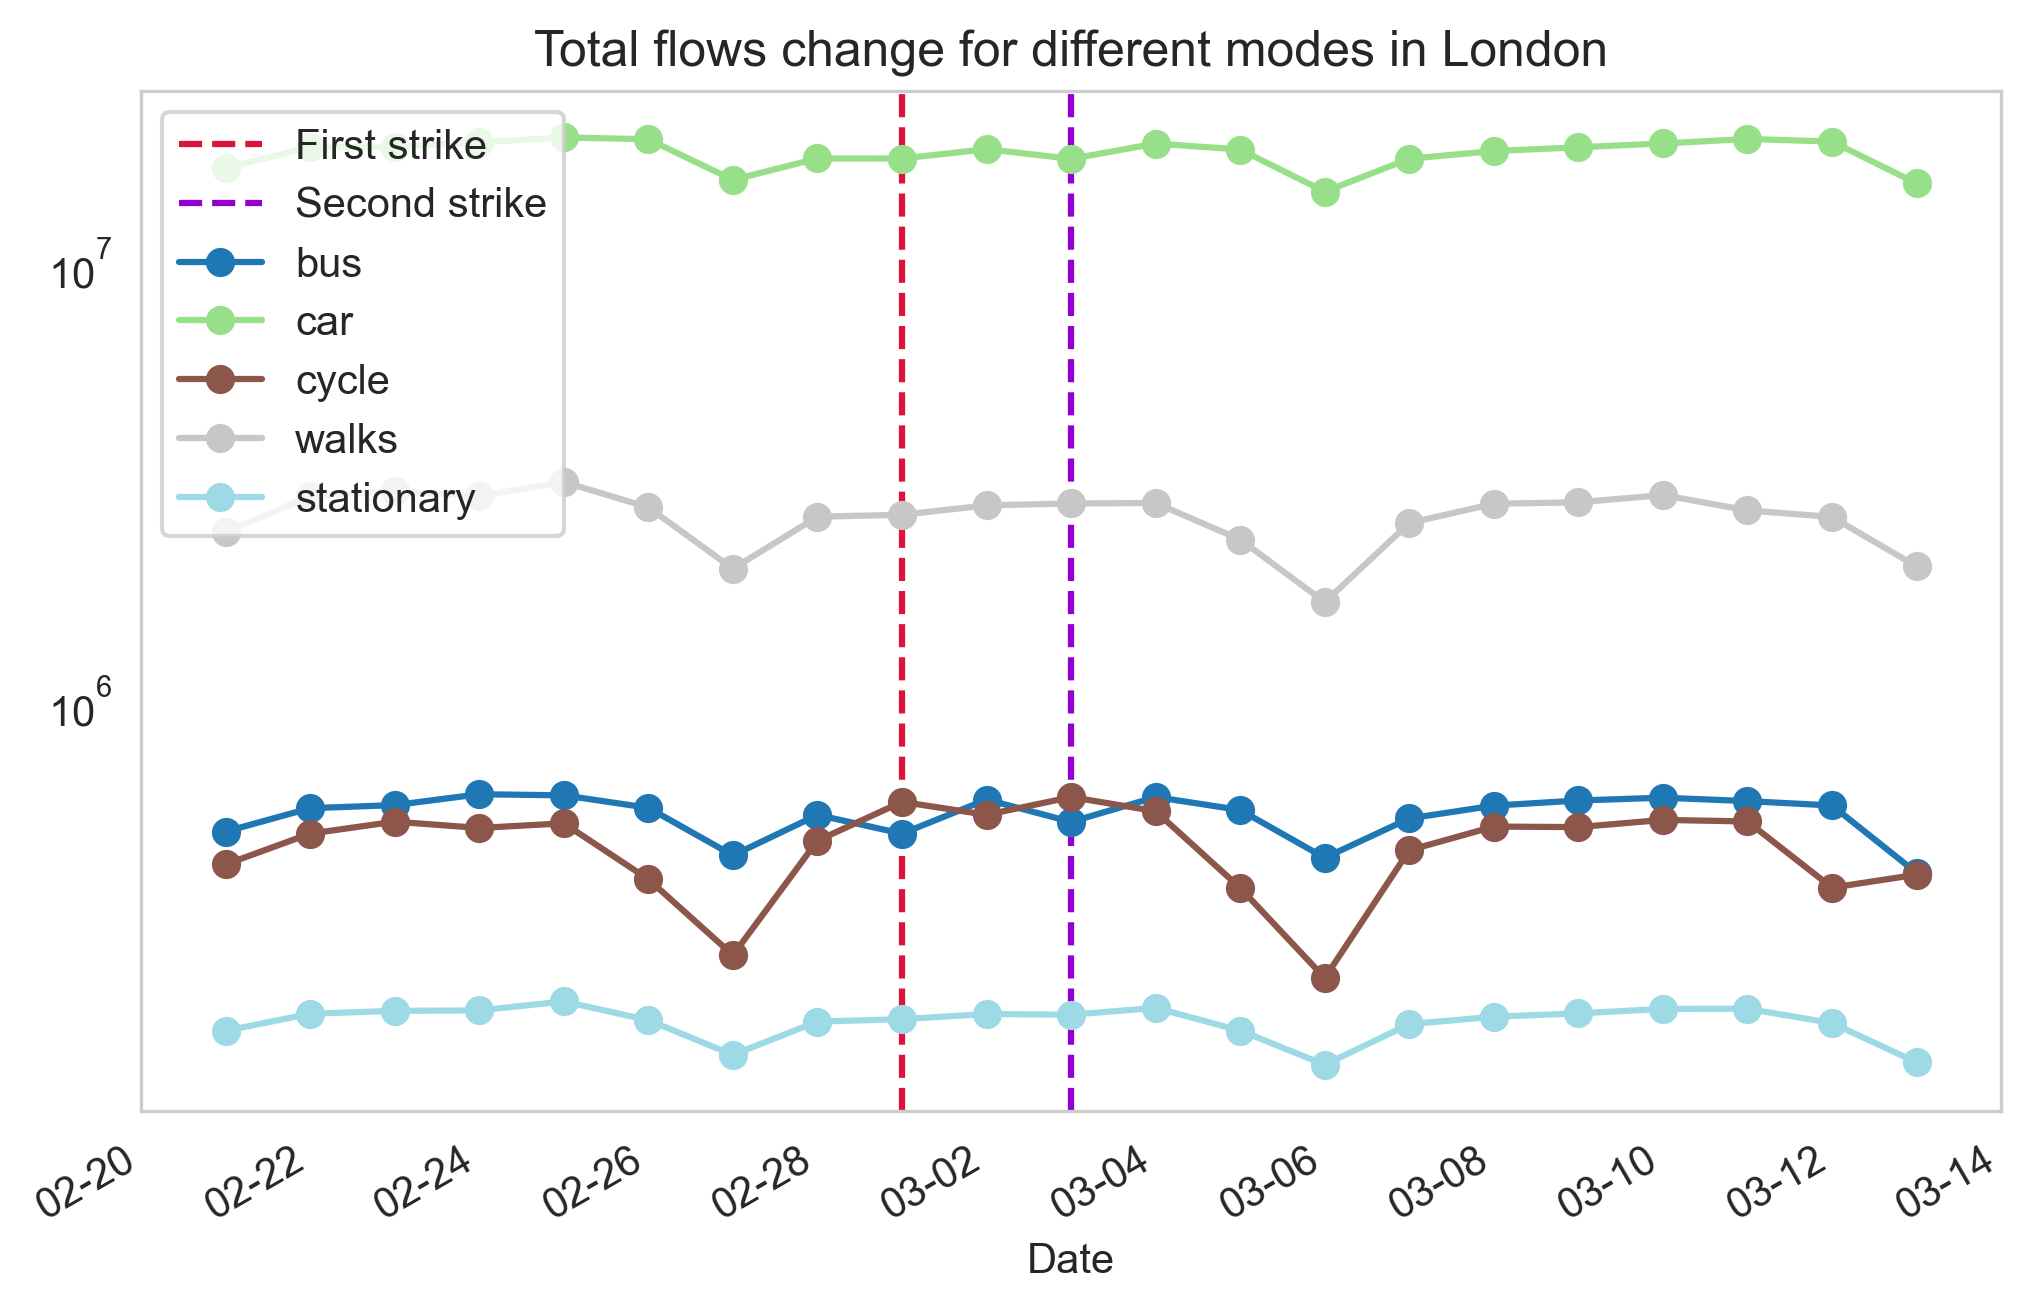

In [23]:
# visualize the total flow data
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
# Add a shaded region
ax.grid(False)
start_date = datetime.datetime(2022, 2, 28)
end_date = datetime.datetime(2022, 3, 6)
strike_start = datetime.datetime(2022, 3, 1)
strike_end = datetime.datetime(2022, 3, 3)
ax.grid(False)
# ax.axvspan(start_date, end_date, color='gray', alpha=0.1, edgecolor='none')
# ax.axvspan(strike_start, strike_end, color='maroon', alpha=0.1, edgecolor='none')
ax.axvline(x=strike_start, color='crimson', linestyle='--', label='First strike')
ax.axvline(x=strike_end, color='darkviolet', linestyle='--', label='Second strike')

# Add text
# text_x = start_date + (end_date - start_date) / 2  # Center of the shaded region
ax.set_yscale('log')
# ymax_all = flows_londonsum.max().max()
# text_y_all = ymax_all / 2  # Middle of the y-axis range in logarithmic scale
# ax.text(text_x, text_y_all, 'Strike week', horizontalalignment='center', verticalalignment='center', color='maroon')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Define the colormap
cmap_o = cm.get_cmap('tab20', len(flows_inner.columns))

for i in range(len(flows_londonsum.columns)):
    ax.plot(flows_londonsum.index, flows_londonsum.iloc[:, i], color=cmap_o(i), label=flows_londonsum.columns[i],
            linewidth=1.5, marker='o')

ax.set_xlabel('Date')
ax.legend(loc='upper left')


# rotate the x-axis ticks
fig.autofmt_xdate()
plt.title('Total flows change for different modes in London')
fig.savefig(
    '/Users/zonghe/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Zonghe Ma/Outout/pics/Total flows change for different modes in London',
    dpi=300, bbox_inches='tight')
plt.show()

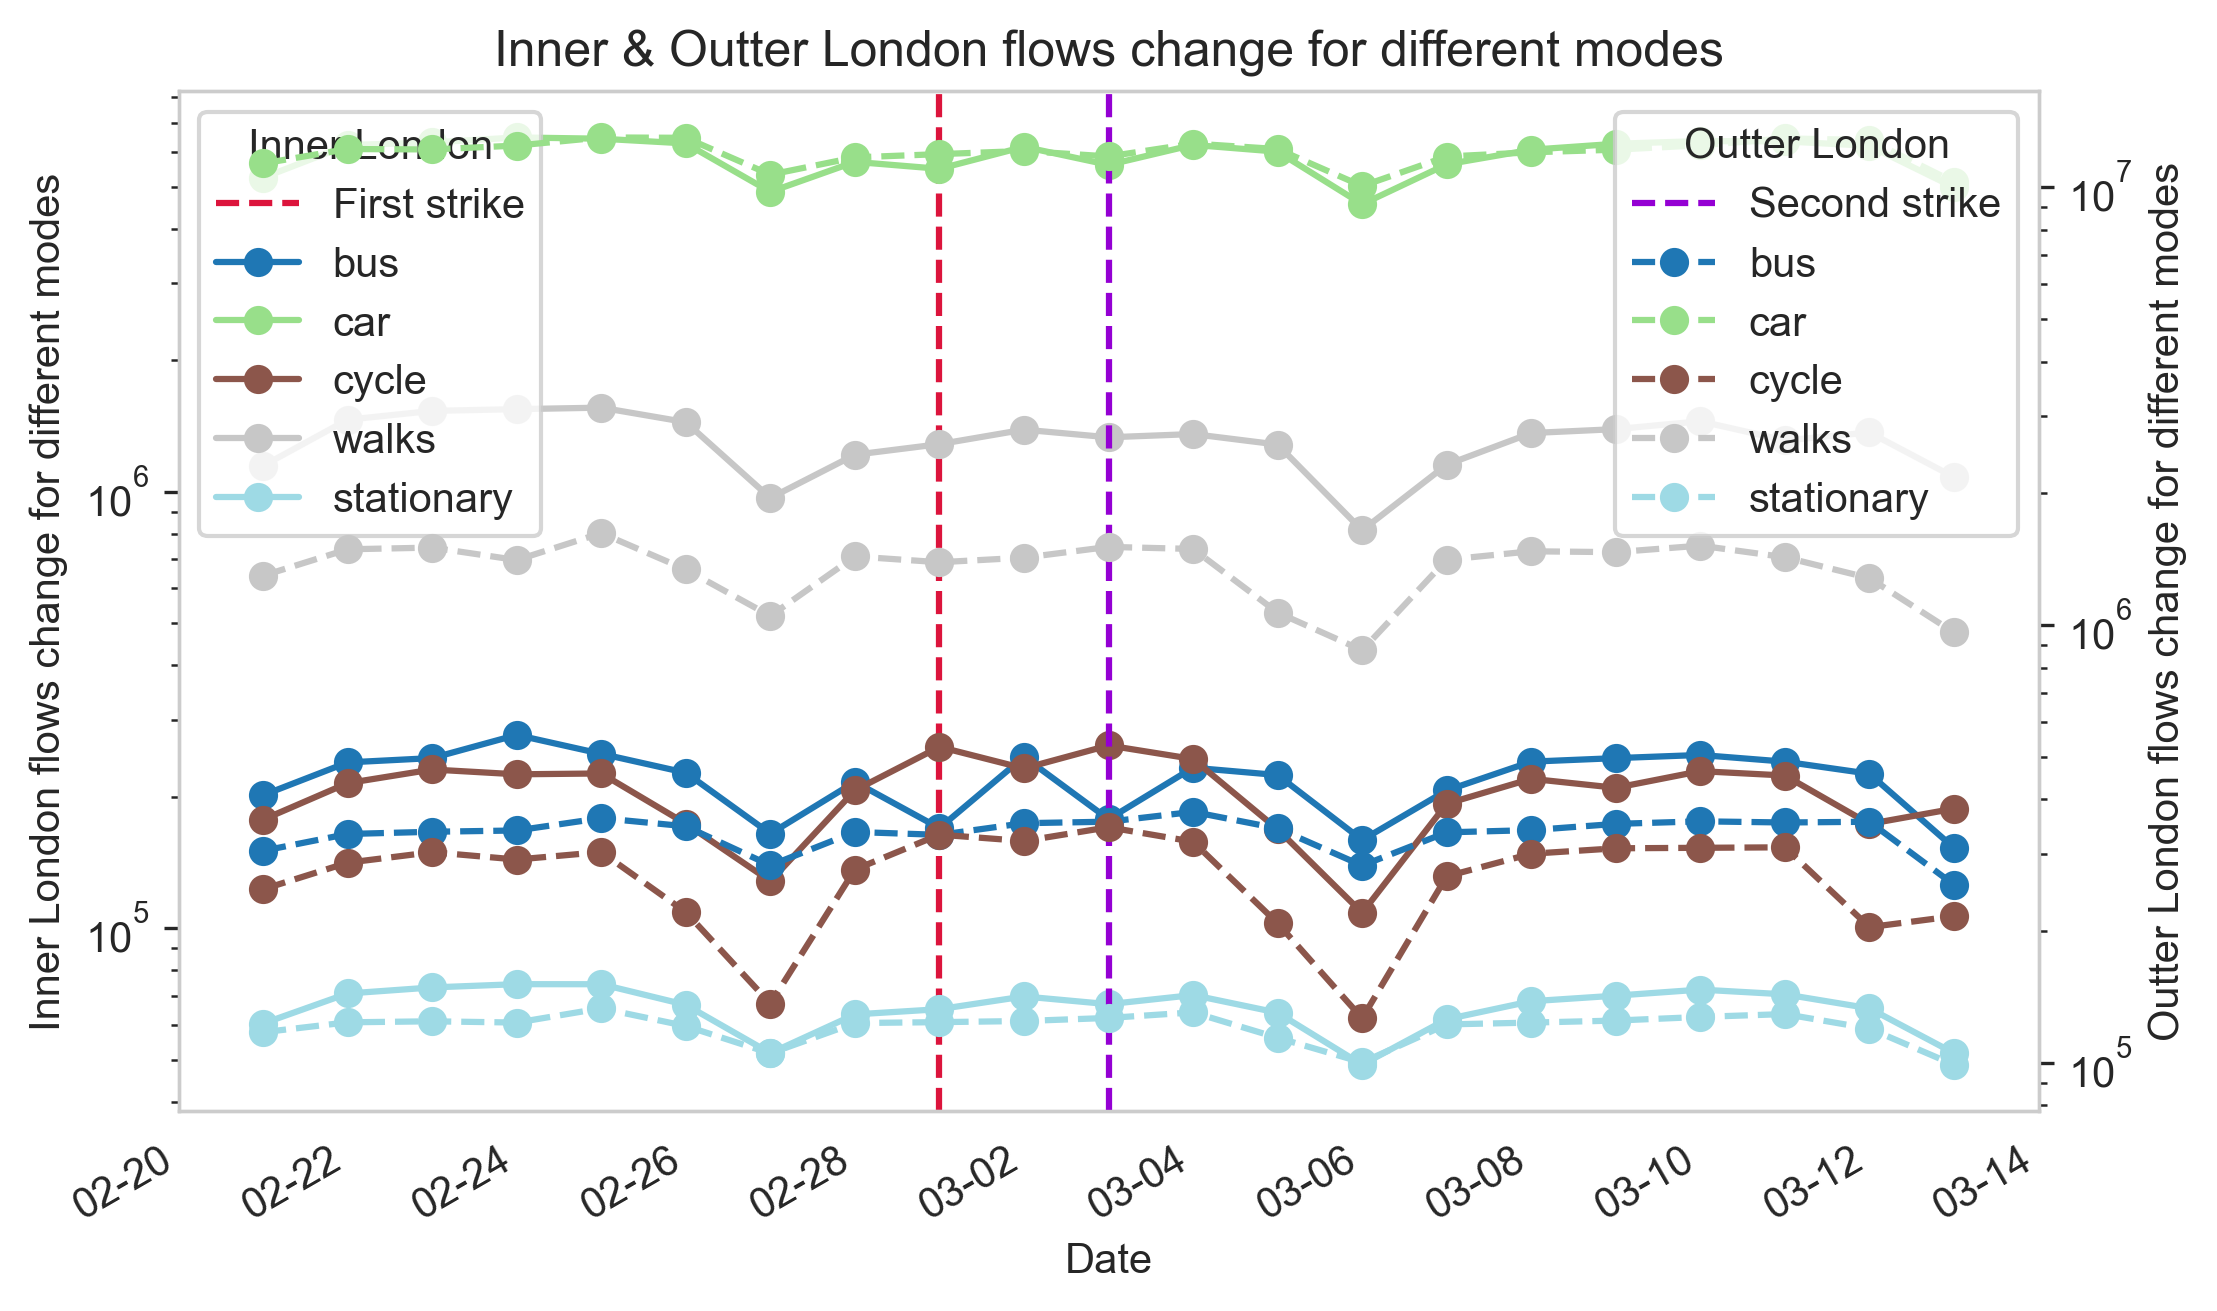

In [24]:
# visualize the inner and outter London flow data
fig, ax1 = plt.subplots(figsize=(8, 5), dpi=300)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# Add a shaded region
start_date = datetime.datetime(2022, 2, 28)
end_date = datetime.datetime(2022, 3, 6)
strike_start = datetime.datetime(2022, 3, 1)
strike_end = datetime.datetime(2022, 3, 3)
# ax1.axvspan(start_date, end_date, color='gray', alpha=0.1, edgecolor='none')
# ax1.axvspan(strike_start, strike_end, color='maroon', alpha=0.1, edgecolor='none')
ax1.axvline(x=strike_start, color='crimson', linestyle='--', label='First strike')
ax2.axvline(x=strike_end, color='darkviolet', linestyle='--', label='Second strike')
# Add text
# text_x = start_date + (end_date - start_date) / 2  # Center of the shaded region
# ax1.set_yscale('log')
# ymax = flows_inner.max().max()
# text_y = ymax / 2  # Middle of the y range
# ax1.text(text_x, text_y, 'Strike week', horizontalalignment='center', verticalalignment='center', color='maroon')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

cmap_o = cm.get_cmap('tab20', len(flows_inner.columns))

for i in range(len(flows_inner.columns)):
    ax1.plot(flows_inner.index, flows_inner.iloc[:, i], color=cmap_o(i), label=flows_inner.columns[i],
             linewidth=1.5, linestyle='-', marker='o')
for i in range(len(flows_outer.columns)):
    ax2.plot(flows_outer.index, flows_outer.iloc[:, i], color=cmap_o(i), label=flows_outer.columns[i],
             linewidth=1.5, linestyle='--', marker='o')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Date')
ax1.set_ylabel('Inner London flows change for different modes')
ax2.set_ylabel('Outter London flows change for different modes')
ax1.legend(loc='upper left', title='Inner London')
ax2.legend(loc='upper right', title='Outter London')
ax1.grid(False)
ax2.grid(False)
plt.title('Inner & Outter London flows change for different modes')
# rotate the x-axis ticks
fig.autofmt_xdate()
fig.savefig(
    '/Users/zonghe/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Zonghe Ma/Outout/pics/Inner & Outter London flows change for different modes',
    dpi=300, bbox_inches='tight')
plt.show()

## Temporal Analysis

### Main part for the time series processing

In [25]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from tqdm import tqdm
import os
import sys
import warnings

warnings.filterwarnings('ignore')
sys.setrecursionlimit(100000)  # Set the recursion limit to a higher value
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler


def blockPrint():
    sys.stdout = open(os.devnull, 'w')


def enablePrint():
    sys.stdout = sys.__stdout__


In [26]:

# Set the general dataframe for the time series analysis as df_temporal
df_temporal = flows_londonsum.copy()
# df_temporal = flows_inner.copy()
# df_temporal = flows_outer.copy()
# creat a list of the types of data, for the purpose of modelling and plotting
types = ['car',
         'bus', 'cycle', 'walks', 'stationary'
         ]

### Main part for the time series processing

In [18]:
blockPrint()

# The loop below is the main part for the time series analysis, including the ADF test, differencing, decomposition, and model fitting and evaluation

# split the data into train and test
train = df_temporal.iloc[:int(0.8 * (len(df_temporal)))]  # 80% of the data as train
test = df_temporal.iloc[int(0.8 * (len(df_temporal))):]  # 20% of the data as test

for i in tqdm(range(len(types))):
    print('{:-^60s}'.format('Time series analysis for {} of London'.format(types[i])))

    # check the stationarity of the time series using ADF test
    globals()['result_0_{}'.format(i + 1)] = adfuller(df_temporal[types[i]],
                                                      autolag='BIC')  # Use the BIC method to automatically select the lag due to the large scale of dataset
    # Use 'globals()' to create a variable in the global scope, so that it can be used in the next loop for visualization

    # print the results of the ADF test
    print('\nThe ADF test for original time series:')
    print('p-value: %f' % globals()['result_0_{}'.format(i + 1)][1])
    print('ADF Statistic: %f' % globals()['result_0_{}'.format(i + 1)][0])
    print('Critical Values:')
    for key, value in globals()['result_0_{}'.format(i + 1)][4].items():
        print('\t%s: %.3f' % (key, value))

    # Difference the time series
    globals()['diff_2_{}'.format(i + 1)] = df_temporal[types[i]].diff().dropna().diff(7).dropna()

    # check the stationarity of the differenced time series using ADF test
    print('\nThe ADF test for differenced time series (Difference order 1):')
    globals()['result_2_{}'.format(i + 1)] = adfuller(globals()['diff_2_{}'.format(i + 1)])
    print('p-value: %f' % globals()['result_2_{}'.format(i + 1)][1])
    print('ADF Statistic: %f' % globals()['result_2_{}'.format(i + 1)][0])
    print('Critical Values:')
    for key, value in globals()['result_2_{}'.format(i + 1)][4].items():
        print('\t%s: %.3f' % (key, value))

    # # fit the ARIMA model # This code block is for the ARIMA model, but it was replaced by the SARIMA model
    # # the order of the model is (p, d, q), where p is the order of the AR term, d is the order of differencing, and q is the order of the MA term
    # model = ARIMA(df_temporal[types[i]], order=(1, 1, 1))
    # globals()['model_fit_{}'.format(i + 1)] = model.fit()
    # # output the summary of the model
    # print('Summary of the ARIMA model for {}:'.format(types[i]))
    # print(globals()['model_fit_{}'.format(i + 1)].summary())
    # # calculate the residuals
    # globals()['residuals_{}'.format(i + 1)] = pd.DataFrame(globals()['model_fit_{}'.format(i + 1)].resid)
    #
    # # forecast the time series in ARIMA model
    # globals()['forecast_{}'.format(i + 1)] = globals()['model_fit_{}'.format(i + 1)].forecast(steps=365)
    # print(globals()['forecast_{}'.format(i + 1)])

    print('\n{:-^60s}'.format('SARIMA Model'))

    # Find the best parameters for the SARIMA model using the grid search method

    # generate all different combinations of p, d, and q triplets
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))

    # generate all different combinations of seasonal p, d, and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 7) for x in pdq]

    # find the best parameters for the model
    best_bic = np.inf
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(df_temporal[types[i]],
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                if results.bic < best_bic:
                    best_bic = results.bic
                    best_params = param
                    best_params_seasonal = param_seasonal
            except:
                continue

    # print the best parameters
    print('Best SARIMA parameters:', best_params, best_params_seasonal)
    globals()['best_bic_{}'.format(i + 1)] = best_bic
    globals()['best_params_{}'.format(i + 1)] = best_params
    globals()['best_params_seasonal_{}'.format(i + 1)] = best_params_seasonal

    # fit the SARIMA model using the best parameters

    # After comparing the forecast results of SARIMA between directly using the steps=365 and using the loop to predict the next single value based on the all previous values, the latter one is better
    # So the loop as a kind of improvement is used for forecasting

    train_data = list(train[types[i]])
    forcast = []
    for data in test[types[i]]:
        model = sm.tsa.statespace.SARIMAX(pd.DataFrame(train_data),
                                          order=best_params,
                                          seasonal_order=best_params_seasonal,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
        globals()['model_fit_{}'.format(i + 1)] = model.fit()
        pre = globals()['model_fit_{}'.format(i + 1)].forecast()
        pre = pre.to_frame(name='value')
        pre = pre.reset_index()
        prediction = pre['value'][0]
        forcast.append(prediction)
        train_data.append(data)

    globals()['forecast_{}'.format(i + 1)] = forcast  # the forecast results of SARIMA model

    # output the SARIMA model summary
    print('Summary of the SARIMA model for {}:'.format(types[i]))
    print(globals()['model_fit_{}'.format(i + 1)].summary())

    # forecast the time series in SARIMA model
    index = pd.date_range(start='2022-03-14', periods=len(test), freq='D')
    globals()['forecast_{}'.format(i + 1)] = pd.DataFrame(globals()['forecast_{}'.format(i + 1)], columns=['value'],
                                                          index=index)
    print(globals()['forecast_{}'.format(i + 1)])

    # calculate the residuals to check the acceptability of the model
    globals()['residuals_{}'.format(i + 1)] = pd.DataFrame(globals()['model_fit_{}'.format(i + 1)].resid)

enablePrint()

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination


### Main part for the time series analysis visualization

In [19]:
# visualizations part
fig, ax = plt.subplots(12, len(types), figsize=(20, 20), dpi=500, constrained_layout=True)
for i in tqdm(range(12)):  # for each row of the figure
    for j in tqdm(range(len(types))):  # for each column of the figure as well as each type of time series
        # plot the decoposition of the time series and pick features
        decomposition = seasonal_decompose(df_temporal[types[j]], model='additive', period=7)
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid
        if i == 0:  # plot the histogram and normal QQ plot of the time series
            sns.distplot(df_temporal[types[j]], hist=True, kde=True, ax=ax[i, j], color='purple')
            ax[i, j].set_title(types[j])
            ax[i, j].legend(loc='upper left')
            # ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            # ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
            # ax2 = ax[i, j].twinx()
            # stats.probplot(df_temporal[types[j]], plot=ax2)
            # ax2.set_ylabel('Normal QQ plot')
        elif i == 1:  # plot the trend and seasonality of the time series
            ax[i, j].plot(df_temporal[types[j]], label='Original time series', color='purple', marker='o')
            ax[i, j].set_title('Temporal features for {}'.format(types[j]))
            ax[i, j].legend(loc='upper left')
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        elif i == 2:  # plot the trend of the original time series
            ax[i, j].plot(trend, label='Trend of original time series', color='purple', marker='o')
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
            ax[i, j].legend(loc='upper left')
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        elif i == 3:  # plot the seasonality of the original time series
            ax[i, j].plot(seasonal, label='Seasonality of original time series', color='purple', marker='o')
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
            ax[i, j].legend(loc='upper left')
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        elif i == 4:  # plot the residuals of the original time series
            ax[i, j].plot(residual, label='Residuals of original time series', color='purple', marker='o')
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
            ax[i, j].legend(loc='upper left')
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        elif i == 5:  # plot the differenced time series, order=1
            ax[i, j].plot(globals()['diff_2_{}'.format(j + 1)], label='Differenced time series(order=2)', marker='o',
                          color='purple')
            ax[i, j].legend(loc='upper left')
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        elif i == 6:  # plot the ACF and PACF of the original time series, we can choose the parameters of the ARIMA and SARIMA model based on the ACF and PACF
            sample_size = len(globals()['diff_2_{}'.format(j + 1)])
            max_lags = sample_size // 2 - 1  # This will give 50% of sample size
            sm.graphics.tsa.plot_acf(globals()['diff_2_{}'.format(j + 1)], ax=ax[i, j], color='purple', lags=max_lags, marker='o')
            ax[i, j].set_title('ACF of differenced time series(order=2)')
            # ax[i, j].set_label('ACF of differenced time series(order=1) for {}'.format(types[j]))
            ax[i, j].legend(loc='upper left')
            # ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            # ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        elif i == 7:
            sm.graphics.tsa.plot_pacf(globals()['diff_2_{}'.format(j + 1)], ax=ax[i, j], color='purple', lags=max_lags, marker='o')
            ax[i, j].set_title('PACF of differenced time series(order=2)')
            # ax[i, j].set_label('PACF of differenced time series(order=1) for {}'.format(types[j]))
            ax[i, j].legend(loc='upper left')
            # ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            # ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        elif i == 8:  # plot the residuals of the SARIMA model to check the acceptability of the model
            ax[i, j].plot(globals()['residuals_{}'.format(j + 1)], linewidth=0.5, label='SARIMA Residuals',
                          color='purple', marker='o')
            ax[i, j].legend(loc='upper left')
            ax[i, j].text(0.25, 0.1, 'Best parameters: {}{}'.format(globals()['best_params_{}'.format(j + 1)],
                                                                    globals()['best_params_seasonal_{}'.format(j + 1)]),
                          horizontalalignment='center', verticalalignment='center', transform=ax[i, j].transAxes)
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        elif i == 9:  # plot the forecast of the SARIMA model
            ax[i, j].plot(df_temporal[types[j]], label='Observed', color='purple', marker='o')
            # ax[i, j].set_xlim(pd.Timestamp('2019-01-01'), pd.Timestamp('2022-12-31'))
            # ax[i, j].set_xlim(pd.Timestamp('2022-12-31'), None)
            ax[i, j].plot(globals()['forecast_{}'.format(j + 1)], label='Forecast', color='orchid')
            ax[i, j].set_title('Forecast of {} by SARIMA'.format(types[j]))
            ax[i, j].legend(loc='upper left')
            ax[i, j].set_xlabel('Date')
            ax[i, j].set_ylabel('Value')
            ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

        # 2 figs below was not shown in the final output because they are not necessary, we can analyze the residuals of the SARIMA model to check the acceptability of the model
        elif i == 10:  # plot the ACF and PACF of the residuals of the SARIMA model
            sm.graphics.tsa.plot_acf(globals()['residuals_{}'.format(j + 1)], ax=ax[i, j], color='purple',
                                     lags=max_lags, marker='o')
            ax[i, j].set_title('ACF of SARIMA residuals')
            # ax[i, j].set_label('ACF of residuals for {}'.format(types[j]))
            ax[i, j].legend(loc='upper left')
            # ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            # ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

        elif i == 11:
            sm.graphics.tsa.plot_pacf(globals()['residuals_{}'.format(j + 1)], ax=ax[i, j], color='purple',
                                      lags=max_lags, marker='o')
            ax[i, j].set_title('PACF of SARIMA residuals')
            # ax[i, j].set_label('PACF of residuals for {}'.format(types[j]))
            ax[i, j].legend(loc='upper left')
            # ax[i, j].xaxis.set_major_locator(mdates.AutoDateLocator())
            # ax[i, j].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        else:
            continue

fig.suptitle('Time series analysis', fontsize=20, fontweight='bold')
plt.show()
fig.savefig(
    '/Users/zonghe/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Zonghe Ma/Outout/pics/[Total]Time series analysis.png',
    dpi=300, bbox_inches='tight')

  0%|          | 0/5 [00:00<?, ?it/s]No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

100%|██████████| 5/5 [00:00<00:00, 354.69it/s]

100%|██████████| 5/5 [00:00<00:00, 356.74it/s]

100%|██████████| 5/5 [00:00<00:00, 433.57it/s]

100%|██████████| 5/5 [00:00<00:00

## Spatial Analysis